# Bank Fraud Detection

## Exploring the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv("fraud_dataset_example.csv")
raw_data = raw_data.drop(columns=["isFlaggedFraud"]) # Drops isFlaggedFraud column

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            101613 non-null  int64  
 1   type            101613 non-null  object 
 2   amount          101613 non-null  float64
 3   nameOrig        101613 non-null  object 
 4   oldbalanceOrg   101613 non-null  float64
 5   newbalanceOrig  101613 non-null  float64
 6   nameDest        101613 non-null  object 
 7   oldbalanceDest  101613 non-null  float64
 8   newbalanceDest  101613 non-null  float64
 9   isFraud         101613 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.8+ MB


In [4]:
raw_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0


In [5]:
num_df = raw_data.select_dtypes(include=["number"]).copy() # Only numeric columns

In [6]:
num_df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.076010,0.004918,0.004737,0.009535,0.011181,-0.051498
amount,0.076010,1.000000,-0.010663,-0.016614,0.244933,0.372792,0.036008
oldbalanceOrg,0.004918,-0.010663,1.000000,0.998963,0.103087,0.072234,-0.004235
newbalanceOrig,0.004737,-0.016614,0.998963,1.000000,0.104622,0.071242,-0.010546
oldbalanceDest,0.009535,0.244933,0.103087,0.104622,1.000000,0.938971,-0.009208
newbalanceDest,0.011181,0.372792,0.072234,0.071242,0.938971,1.000000,-0.006353
isFraud,-0.051498,0.036008,-0.004235,-0.010546,-0.009208,-0.006353,1.000000


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'oldbalanceOrg'}>,
        <Axes: title={'center': 'newbalanceOrig'}>],
       [<Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>]], dtype=object)

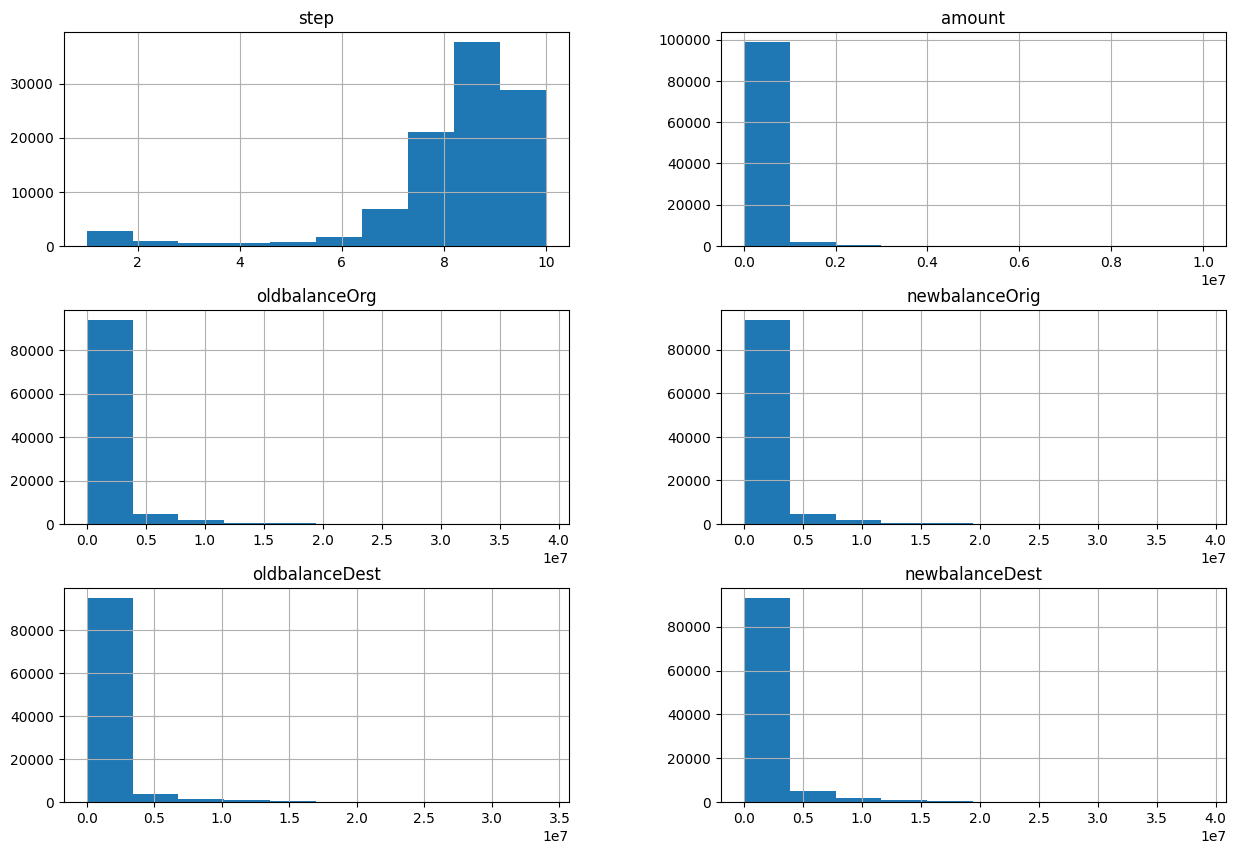

In [7]:
num_df.drop(columns=["isFraud"]).select_dtypes(include=["number"]).hist(figsize=(15, 10)) # 

In [8]:
raw_data["step"].value_counts().sort_index()

step
1      2708
2      1014
3       552
4       565
5       665
6      1660
7      6837
8     21097
9     37628
10    28887
Name: count, dtype: int64

In [9]:
raw_data["type"].value_counts()

type
PAYMENT     40062
CASH_OUT    31310
CASH_IN     20540
TRANSFER     8689
DEBIT        1012
Name: count, dtype: int64

## Preparing the Data

In [10]:
X = raw_data.drop(columns=["isFraud"])
y = raw_data["isFraud"]

In [11]:
cnt = np.bincount(y)
print("0s:", cnt[0])
print("1s:", cnt[1])

0s: 101497
1s: 116


### Over-Sampling the Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y) # train-test split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train) # train-validation split

In [13]:
y_train_cnt = np.bincount(y_train)
print(y_train_cnt[1] / (y_train_cnt[0] + y_train_cnt[1]))

0.0011379013408783368


In [14]:
y_test_cnt = np.bincount(y_test)
print(y_test_cnt[1] / (y_test_cnt[0] + y_test_cnt[1]))

0.0011317226787383753


In [15]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [16]:
cnt_os = np.bincount(y_train)
print("0s:", cnt_os[0])
print("1s:", cnt_os[1])

0s: 64958
1s: 64958


In [17]:
X_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,8,PAYMENT,6901.81,C948923747,3502.00,0.00,M1284109170,0.00,0.00
1,2,DEBIT,5360.40,C1657512321,586.00,0.00,C1240730624,42198.00,36078.93
2,7,CASH_IN,45157.63,C1460026888,8281621.57,8326779.20,C1335946878,563659.72,828787.26
3,9,CASH_OUT,215743.49,C130813359,0.00,0.00,C1452646606,1382595.54,1324824.36
4,7,PAYMENT,7108.60,C162031731,5782357.13,5775248.53,M1578701804,0.00,0.00
...,...,...,...,...,...,...,...,...,...
129911,6,CASH_OUT,17246.00,C1484518113,17246.00,0.00,C978609035,0.00,17246.00
129912,4,CASH_OUT,86070.17,C1699873763,86070.17,0.00,C560041895,0.00,86070.17
129913,1,CASH_OUT,235238.66,C1499825229,235238.66,0.00,C2100440237,0.00,235238.66
129914,7,CASH_OUT,5460002.91,C1588880909,5460002.91,0.00,C1570256460,0.00,9281535.44


### Encoding and Scaling the Data

In [18]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelBinarizer

In [19]:
num_cols = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]

oe = OrdinalEncoder(categories=[[1,2,3,4,5,6,7,8,9,10]]).fit(X_train[["step"]])
lb = LabelBinarizer().fit(X_train["type"])
ss = StandardScaler().fit(X_train[num_cols])

In [21]:
def transform_data(data):
    df = data.copy()

    step_df = pd.DataFrame(oe.transform(df[["step"]]), columns=["step"])
    type_df = pd.DataFrame(lb.transform(df["type"]), columns=[col.lower() for col in lb.classes_])
    num_df = pd.DataFrame(ss.transform(df[num_cols]), columns=num_cols)

    return pd.concat([step_df, type_df, num_df], axis=1)

In [22]:
X_train = transform_data(X_train)
X_val = transform_data(X_val)
X_test = transform_data(X_test)

In [23]:
X_test

,step,cash_in,cash_out,debit,payment,transfer,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,7.0,0,1,0,0,0,-0.190572,-0.320803,-0.229971,0.226932,-0.017422
1,8.0,0,1,0,0,0,-0.285926,-0.320803,-0.229971,-0.257774,-0.336683
2,9.0,0,0,0,1,0,-0.307781,-0.320803,-0.229971,-0.279579,-0.366480
3,9.0,1,0,0,0,0,-0.171682,-0.258633,-0.068771,-0.087303,-0.290302
4,8.0,1,0,0,0,0,-0.161394,-0.316656,-0.130907,-0.279579,-0.366480
...,...,...,...,...,...,...,...,...,...,...,...
20318,9.0,1,0,0,0,0,-0.128100,-0.320685,-0.114355,-0.197180,-0.366480
20319,7.0,0,0,0,1,0,-0.299514,-0.241688,-0.141952,-0.279579,-0.366480
20320,9.0,0,1,0,0,0,-0.006279,-0.309770,-0.229971,0.030078,-0.249261
20321,6.0,0,0,0,0,1,-0.069681,-0.197978,-0.229971,-0.232694,-0.259755


## Building Models

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

A function to print basic classification metrics (accuracy, precision, recall, F1 score) and display a confusion matrix: 

In [26]:
def plot_metrics(model, y_pred):
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Precision:", precision_score(y_val, y_pred))
    print("Recall:", recall_score(y_val, y_pred))
    print("F1 Score:", f1_score(y_val, y_pred))

    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val, y_pred), display_labels=model.classes_)
    disp.plot()

#### Logistic Regression

Accuracy: 0.9167794316644113
Precision: 0.013138686131386862
Recall: 0.9473684210526315
F1 Score: 0.02591792656587473


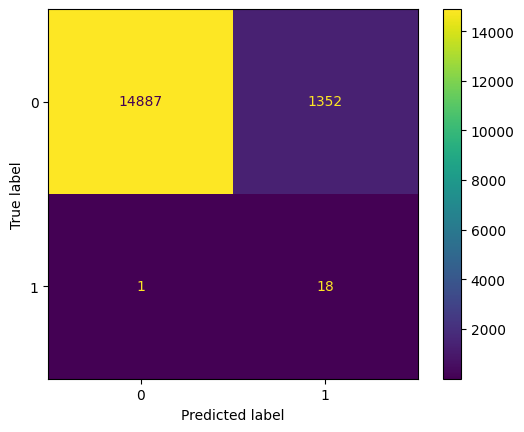

In [97]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=500, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)

plot_metrics(lr, y_pred)

In [ ]:
params = {
    "penalty": ["l1", "l2", "elasticnet", None],
    "C": np.linspace(0, 2, 8),
    "class_weight": [None, {0: 1.0, 1:2.0}]
}

scorer = make_scorer(recall_score, pos_label=1)  # adjust pos_label as needed
lr_grid = GridSearchCV(estimator=LogisticRegression(max_iter=500), param_grid=params, scoring=scorer)

lr_grid.fit(X_train, y_train)
y_pred = lr_grid.predict(X_val)

plot_metrics(lr_grid, y_pred)

In [231]:
lr_grid.best_params_

{'C': 0.2857142857142857, 'class_weight': {0: 1.0, 1: 2.0}, 'penalty': 'l2'}

#### Decision Tree Classifier

Accuracy: 0.9990773772911797
Precision: 0.6666666666666666
Recall: 0.42105263157894735
F1 Score: 0.5161290322580645


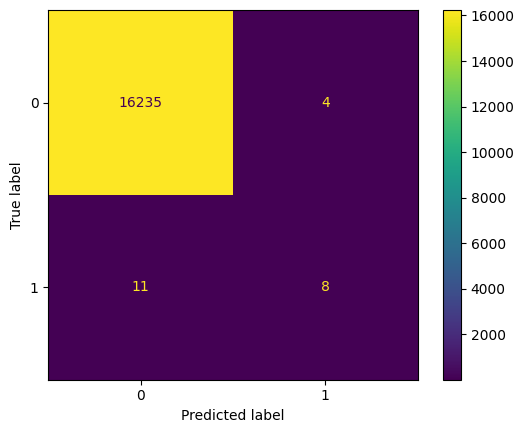

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_val)

plot_metrics(dtc, y_pred)

In [ ]:
 ### NOT SURE WHICH ONE HAD GOOD TEST SCORES NEED TO FIGURE OUT ### 

# params = {
#     # "max_depth": [10, 20, 30],
#     "min_samples_split": [5, 10, 15],
#     "min_samples_leaf": [3, 6, 9],
#     "class_weight": [None, {0: 2.0, 1:1.0}, {0: 1.0, 1:2.0}, {0: 4.0, 1:1.0}],
#     "splitter": ["best"],
#     "max_leaf_nodes": [10]
#     # ,"min_impurity_decrease": np.linspace(0, 0.5, 10)
# }

params = {
    "max_depth": [10, 20, 30],
    "min_samples_split": [10, 25, 50],
    "min_samples_leaf": [5, 10, 15],
    "class_weight": [None, {0: 2.0, 1:1.0}, {0: 1.0, 1:2.0}],
    "splitter": ["best", "random"],
    "max_leaf_nodes": [50, 100, 150],
    "min_impurity_decrease": np.linspace(0, 0.5, 10)
}

# params = {
#     'class_weight': [None], # Default None
#     'max_depth': [10], # Default None
#     'max_leaf_nodes': [10], # Default None
#     'min_impurity_decrease': [0.0], # Default None
#     'min_samples_leaf': [5], # Default 1
#     'min_samples_split': [10], # Default 2
#     'splitter': ['best'] # Default "best"
# }

scorer = make_scorer(recall_score, pos_label=1)  # adjust pos_label as needed
dtc_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, scoring=scorer)

dtc_grid.fit(X_train, y_train)
y_pred = dtc_grid.predict(X_val)

plot_metrics(dtc_grid, y_pred)

KeyboardInterrupt: 

Accuracy: 0.9717062369295116
Precision: 0.025806451612903226
Recall: 0.631578947368421
F1 Score: 0.049586776859504134


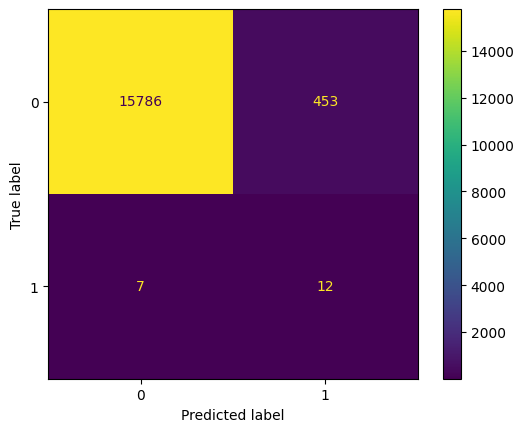

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc_opt = DecisionTreeClassifier(class_weight=None,
                                 splitter="best",
                                 min_samples_split=10, 
                                 min_samples_leaf=5, 
                                 min_impurity_decrease=0.0, 
                                 max_leaf_nodes=10, 
                                 max_depth=10)
dtc_opt.fit(X_train, y_train)
y_pred = dtc_opt.predict(X_val)

plot_metrics(dtc_opt, y_pred)

In [249]:
dtc_grid.best_params_

{'class_weight': None,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'best'}

Accuracy: 0.9989543609300037
Precision: 0.6
Recall: 0.3157894736842105
F1 Score: 0.41379310344827586


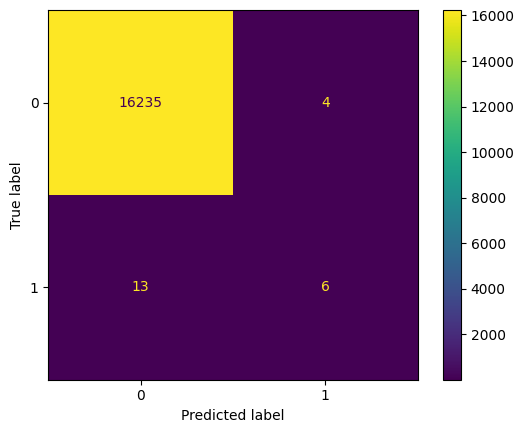

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_val)

plot_metrics(rfc, y_pred)

Accuracy: 0.9916963956206175
Precision: 0.09154929577464789
Recall: 0.6842105263157895
F1 Score: 0.16149068322981366


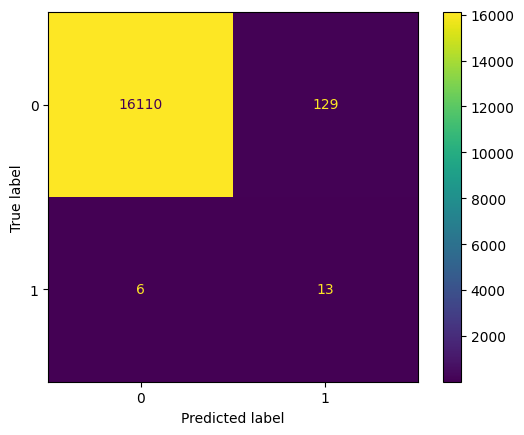

In [31]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(max_iter=400)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_val)

plot_metrics(nn, y_pred)

Accuracy: 0.975938591743345
Precision: 0.04133858267716536
Recall: 0.9130434782608695
F1 Score: 0.07909604519774012


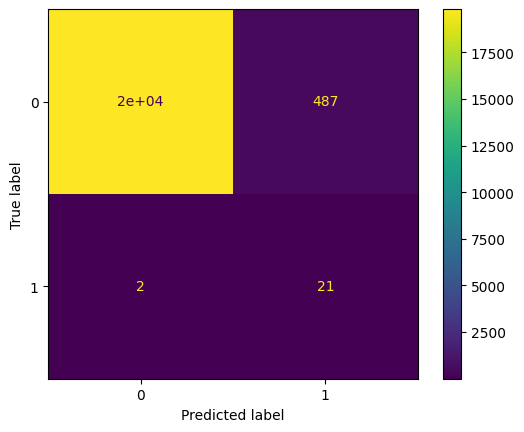

In [ ]:
y_pred = (nn.predict_proba(X_val)[:, 1] >= 0.05).astype(bool)
plot_metrics(nn, y_pred)

Accuracy: 0.995079466614181
Precision: 0.14018691588785046
Recall: 0.6521739130434783
F1 Score: 0.23076923076923078


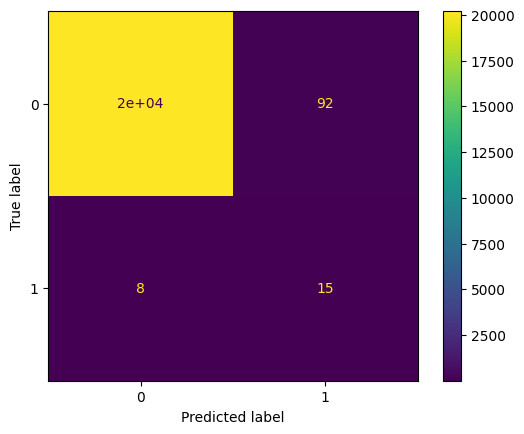

In [ ]:
nn_2 = MLPClassifier(hidden_layer_sizes=(100,100))
nn_2.fit(X_train, y_train)
y_pred = nn_2.predict(X_val)

plot_metrics(nn_2, y_pred)

Accuracy: 0.9870097918614378
Precision: 0.06181818181818182
Recall: 0.7391304347826086
F1 Score: 0.11409395973154363


c:\Users\noahf\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


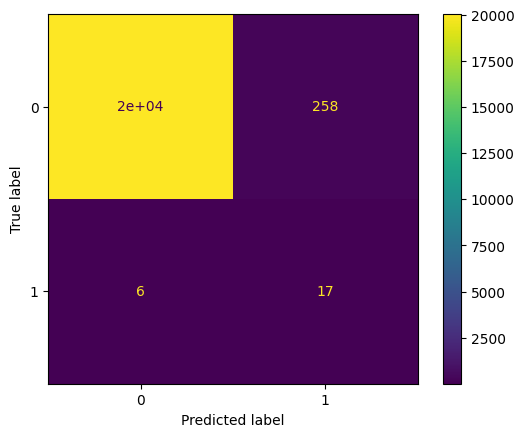

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

params = {
    "hidden_layer_sizes": [(100, 100)],
    "activation": ["relu"]
}

nn_grid = GridSearchCV(MLPClassifier(), params)
nn_grid.fit(X_train, y_train)
y_pred = nn_grid.predict(X_val)

plot_metrics(nn_grid, y_pred)

In [ ]:
nn_grid.best_params_

### Predictions Based on Probabilities

In [ ]:
# Because recall is the metric we care most about, we are trying to maximize it 
def test_probability(model):
    scores = {}
    for i in range(0, 100, 5):
        i = round(i * 0.01, 2)
        y_pred = (model.predict_proba(X_val)[:, 1] >= i).astype(bool)
        accuracy = round(accuracy_score(y_val, y_pred), 2)
        precision = round(precision_score(y_val, y_pred), 2)
        recall = round(recall_score(y_val, y_pred), 2)
        # f1 = round(f1_score(y_val, y_pred), 2)
        scores[i] = [accuracy, precision, recall]

    best_score = 0
    best_thresh = 0 
    for item in scores:
        # scores[item][0] = accuracy
        # scores[item][1] = precision
        # scores[item][2] = recall
        if scores[item][0] > 0.95 and scores[item][1] > 0.5 and scores[item][2] > best_score:
            best_score = scores[item][2]
            best_thresh = item

    best_thresh = float(best_thresh) # convert to float

    if best_thresh > 0.0: # if an appropriate threshold above 0 was found
        print("Best Threshold:", best_thresh)
        print("=" * 20)
        y_pred = (model.predict_proba(X_val)[:, 1] >= best_thresh).astype(bool)
        plot_metrics(model, y_pred)
    else:  # if no appropriate thresholds above 0 were found
        print("No suitable thresholds found")

    # return scores
    # return float(best_thresh)

#### Logistic Regression

In [125]:
test_probability(lr)

No suitable thresholds found


#### Decision Tree

Best Threshold: 0.05
Accuracy: 0.9990773772911797
Precision: 0.6666666666666666
Recall: 0.42105263157894735
F1 Score: 0.5161290322580645


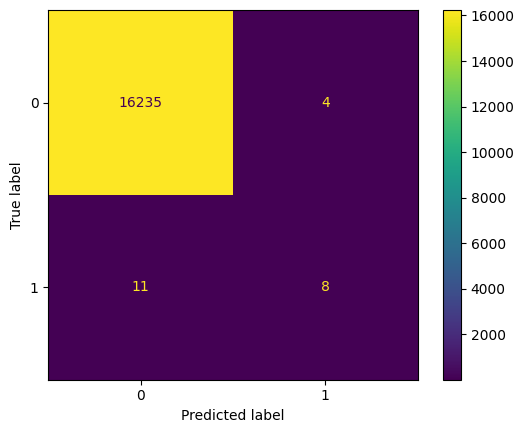

In [126]:
test_probability(dtc)

#### Random Forest

Best Threshold: 0.15
Accuracy: 0.9990773772911797
Precision: 0.5909090909090909
Recall: 0.6842105263157895
F1 Score: 0.6341463414634146


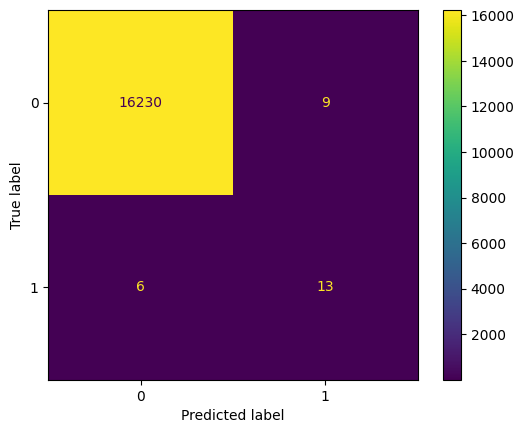

In [127]:
test_probability(rfc)

In [128]:
test_probability(nn)

No suitable thresholds found
